In [ ]:
# import library and load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# load dataset
data_path = '../data/processed/data_cleaned_scaled.csv' 
data = pd.read_csv(data_path)

numerical_cols = ['Admission grade', 
                  'Unemployment rate', 
                  'Inflation rate', 
                  'GDP', 
                  'Application order',
                  'Age at enrollment',
                  'Previous qualification (grade)', 
                  'Curricular units 1st sem (credited)', 
                  'Curricular units 1st sem (enrolled)', 
                  'Curricular units 1st sem (evaluations)', 
                  'Curricular units 1st sem (approved)', 
                  'Curricular units 1st sem (grade)', 
                  'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)', 
                  'Curricular units 2nd sem (enrolled)', 
                  'Curricular units 2nd sem (evaluations)', 
                  'Curricular units 2nd sem (approved)', 
                  'Curricular units 2nd sem (grade)', 
                  'Curricular units 2nd sem (without evaluations)']  
categorical_cols = [col for col in data.columns if col not in numerical_cols]

# set numerical and categorical features
data[numerical_cols] = data[numerical_cols].astype(float)
data[categorical_cols] = data[categorical_cols].astype("category")

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Num Features: 34, Accuracy: 0.875389
Num Features: 1, Accuracy: 0.802773
Num Features: 2, Accuracy: 0.780166
Num Features: 3, Accuracy: 0.803618
Num Features: 4, Accuracy: 0.819163
Num Features: 5, Accuracy: 0.826791
Num Features: 6, Accuracy: 0.828488
Num Features: 7, Accuracy: 0.838659
Num Features: 8, Accuracy: 0.848829
Num Features: 9, Accuracy: 0.872565
Num Features: 10, Accuracy: 0.870870
Num Features: 11, Accuracy: 0.873130
Num Features: 12, Accuracy: 0.873695
Num Features: 13, Accuracy: 0.873694
Num Features: 14, Accuracy: 0.878216
Num Features: 15, Accuracy: 0.875110
Num Features: 16, Accuracy: 0.875958
Num Features: 17, Accuracy: 0.873415
Num Features: 18, Accuracy: 0.877935
Num Features: 19, Accuracy: 0.874262
Num Features: 20, Accuracy: 0.876805
Num Features: 21, Accuracy: 0.877369
Num Features: 22, Accuracy: 0.877368
Num Features: 23, Accuracy: 0.877935
Num Features: 24, Accuracy: 0.875108
Num Features: 25, Accuracy: 0.879064
Num Features: 26, Accuracy: 0.879064
Num Featur

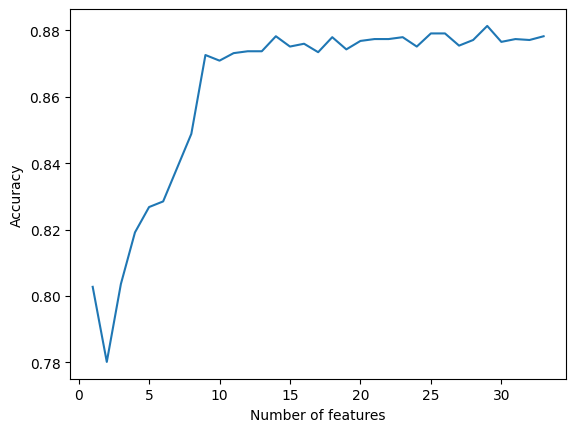

In [6]:
# loop through the # of features to select and plot the accuracy

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

# first calculate the accuracy for all features
model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Num Features: %d, Accuracy: %f" % (X_train.shape[1], scores.mean()))

rfe_scores = []

for n in range(1, X.shape[1]):
    rfe = RFE(RandomForestClassifier(), n_features_to_select=n)
    rfe.fit(X_train, y_train)
    X_train_selected = X_train[X_train.columns[rfe.support_]]

    model = RandomForestClassifier()
    scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    print("Num Features: %d, Accuracy: %f" % (n, scores.mean()))
    rfe_scores.append(scores.mean())

plt.plot(range(1, X_train.shape[1]), rfe_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()

In [7]:
# finally test the model on test set
n_features = 12
rfe = RFE(RandomForestClassifier(), n_features_to_select=n_features)
rfe.fit(X_train, y_train)
X_train_selected = X_train[X_train.columns[rfe.support_]]
X_test_selected = X_test[X_test.columns[rfe.support_]]

model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
print(model.score(X_test_selected, y_test))


0.848587570621469


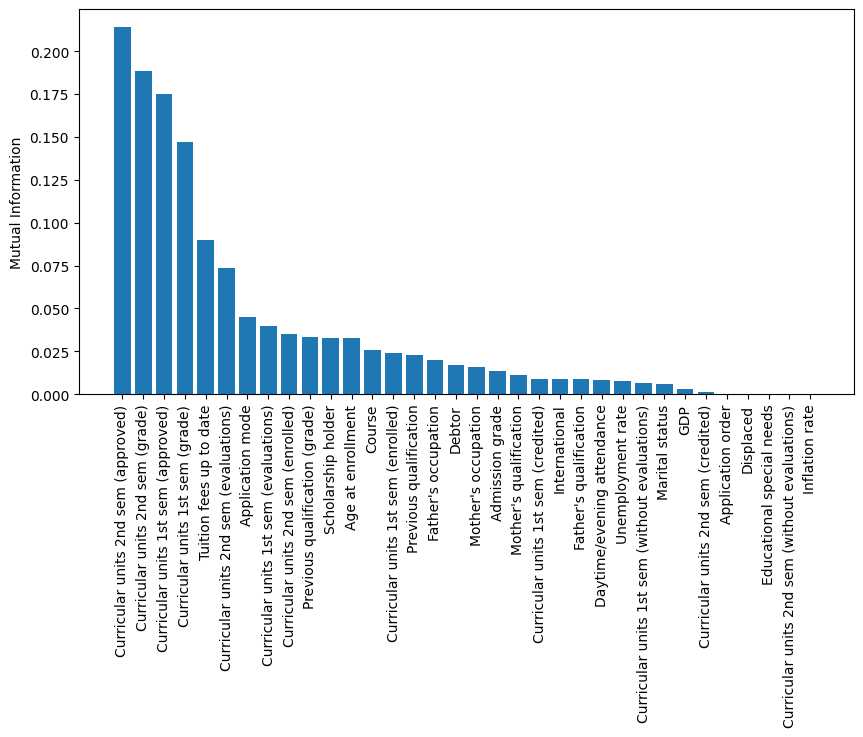

In [8]:
# feature selection using Mutual Information

from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train, random_state=0)

# sort the mutual information in non-ascending order
mutual_info = pd.Series(mutual_info, index=X_train.columns).sort_values(ascending=False)
# sort the columns in non-ascending order
X_train_sorted = X_train[mutual_info.index]

# plot the mutual information in non-ascending order
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(X_train_sorted.columns, mutual_info)
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.show()


Num Features: 1, Accuracy: 0.836678
Num Features: 2, Accuracy: 0.813224
Num Features: 3, Accuracy: 0.813790
Num Features: 4, Accuracy: 0.815488
Num Features: 5, Accuracy: 0.847979
Num Features: 6, Accuracy: 0.854479
Num Features: 7, Accuracy: 0.861828
Num Features: 8, Accuracy: 0.860977
Num Features: 9, Accuracy: 0.868609
Num Features: 10, Accuracy: 0.862393
Num Features: 11, Accuracy: 0.864373
Num Features: 12, Accuracy: 0.871718
Num Features: 13, Accuracy: 0.873413
Num Features: 14, Accuracy: 0.874260
Num Features: 15, Accuracy: 0.871153
Num Features: 16, Accuracy: 0.873978
Num Features: 17, Accuracy: 0.871437
Num Features: 18, Accuracy: 0.876237
Num Features: 19, Accuracy: 0.875110
Num Features: 20, Accuracy: 0.876805
Num Features: 21, Accuracy: 0.872848
Num Features: 22, Accuracy: 0.881891
Num Features: 23, Accuracy: 0.873696
Num Features: 24, Accuracy: 0.875954
Num Features: 25, Accuracy: 0.879065
Num Features: 26, Accuracy: 0.880477
Num Features: 27, Accuracy: 0.876803
Num Featur

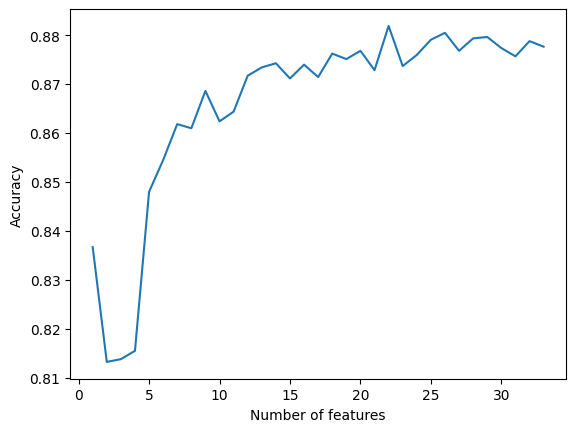

In [9]:
# check the accuracy with the top N features

mi_scores = []
for n in range(1, X.shape[1]):
    X_selected = X_train_sorted[X_train_sorted.columns[:n]]
    model = RandomForestClassifier()
    scores = cross_val_score(model, X_selected, y_train, cv=5)
    mi_scores.append(scores.mean())
    print("Num Features: %d, Accuracy: %f" % (n, scores.mean()))

plt.plot(range(1, X.shape[1]), mi_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()


In [10]:
# test it on X_test
n_features = 12
X_train_selected = X_train_sorted[X_train_sorted.columns[:n_features]]
X_test_sorted = X_test[mutual_info.index]
X_test_selected = X_test_sorted[X_test_sorted.columns[:n_features]]
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
print(model.score(X_test_selected, y_test))

0.848587570621469
